# DSEG discord channel classifier

### Acceptance Criteria
For the bot to be enabled in DSEG, it must meet the threshold of 5% false positives on detecting posts in the wrong channel and 90% accuracy in suggesting the correct channel. A test dataset of 50 utterances has been withheld and will be used to evaluate your project upon submission. The test dataset has 3 fields: utterance, guessed-channel, true-channel. Your bot (or model) must determine if guessed channel is false with 95% specificity, and identify the true channel with 90% accuracy. There will be a leaderboard showing the performance rankings of all participants.

- Aim for 90% accuracy
- 5% false positive

### Dataset
In this repo is utterance-channel-dataset.csv, a dataset consisting of 300 posts and the corresponding appropriate channel for each post.

x - tfidf vectorized words
y - channel classes

### Plan
The plan is to preprocess your text data using TF-IDF (NLP), build a classifier using an SVM (ML), run your code in a Jupyter notebook, and leverage functions from SKLearn. Resources are available below to explain all the above concepts. If you have the time and motivation, a good challenge is to implement SVMs with stochastic gradient descent from scratch. If there is time permitting build a Flask, run it in AWS, use the Discord API, and deploy your moderator bot in our server. Keep in mind that at the halfway point and at completion you will present your work to the community. Make sure to have some progress and work to show at each point to stay accountable and to provide teaching for more novice members of the community.

- tf-idf word vec
- SVM classifier

In [36]:
# import relavant libs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [37]:
# read in df and randomly shuffle the order
df = shuffle(pd.read_csv('discord.csv'))
df.head()

,Utterance,Channel,ID
34,We have merged a new command to @Sir Lancebot:...,community-requests,35
8,Food names We've changed the names of our help...,community-requests,9
123,"Hi everyone, I am Kelvin from Nairobi, Kenya. ...",Introduction,124
76,Hey guys quick question. I’ve been looking thr...,general-questions,77
87,How long would it take to train an RNN on 200M...,general-questions,88


In [38]:
# convert to tfidf vector
feature_extraction = TfidfVectorizer(min_df=3) # manually tested a few different min_df, 3 seems best
X = feature_extraction.fit_transform(df['Utterance'].values)
num_training = round(.8*len(df))
print("Train size: ", num_training, "| Test size: ", (len(df)-num_training))
X_train = X[:num_training]
X_test = X[num_training:]
y_train = df["Channel"].values[:num_training]
y_test = df["Channel"].values[num_training:]

Train size:  240 | Test size:  60


In [39]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear','poly','rbf','sigmoid'],
            'decision_function_shape':['ovo','ovr']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear ..
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=poly ....
[CV]  C=0.1, decision_fun

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid .
[CV]  C=0.1, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=linear, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=linear ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=auto, kernel=linear, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=auto, kernel=l

[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf .......
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid ...
[CV]  C=0.1, decis

[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly ...
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....
[CV]  C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovo, gamma=0.0001, kernel=rbf ....


[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly ........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly ........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly ........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly ........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf .........
[CV]  C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=1, kernel=rbf .........
[CV]  C=0.1, decision_functio

[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly ....
[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .....
[CV]  C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=0.1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .....
[CV]  

[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=linear, score=0.625, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=poly, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=poly, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=auto, kernel=rbf ........
[CV]  C=1, decision_

[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly .......
[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=rbf ........
[CV]  C=1, decision_function_shape=ovo, gamma=0.01, kernel=rbf, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.01, kernel=rbf ........
[CV]  C=1, decision_fun

[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid ..
[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid ..
[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid ..
[CV]  C=1, decision_function_shape=ovo, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=scale, kernel=linear ....
[CV]  C=1, decision_function_shape=ovr, gamma=scale, kernel=linear, score=0.646, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=scale, kernel=linear ....
[CV]  C=1, decision_function_shape=ovr, gamma=scale, kernel=linear, score=0.625, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=scale, kernel=linear .

[CV]  C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, score=0.646, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid .......
[CV]  C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, score=0.646, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid .......
[CV]  C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, score=0.667, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid .......
[CV]  C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, score=0.521, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid .......
[CV]  C=1, decision_function_shape=ovr, gamma=1, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.1, kernel=linear ......
[CV]  C=1, decision_function_shape=ovr, gamma=0.1, kernel=linear, score=0.646, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.1, kernel=linear ......
[CV]  C=1, decision_f

[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly ......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly ......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly ......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=1, decision_function_shape=ovr, gamma=0.001, kernel=rbf .......
[CV]  C=1, decisio

[CV]  C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.521, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid ..
[CV]  C=10, decision_function_shape=ovo, gamma=scale, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=linear ....
[CV]  C=10, decision_function_shape=ovo, gamma=auto, kernel=linear, score=0.583, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=linear ....
[CV]  C=10, decision_function_shape=ovo, gamma=auto, kernel=linear, score=0.625, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=auto, kernel=linear .

[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=poly, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=poly .......
[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=poly, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=poly .......
[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=poly, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf ........
[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.646, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf ........
[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf ........
[CV]  C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf, score=0.646, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.1, kernel=rbf ........
[CV]  C=10, decision_func

[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear, score=0.583, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear, score=0.625, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear ..
[CV]  C=10, decision_function_shape=ovo, gamma=0.0001, kernel=linear, score=0.646, total=   0.0s
[CV] C=10, decision_function_shape=ovo, gamma=0.0001, kernel=li

[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=auto, kernel=sigmoid ...
[CV]  

[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=rbf, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=rbf, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=rbf .......
[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=rbf, score=0.208, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid ...
[CV]  C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=10, decision_function_shape=ovr, gamma=0.01, kernel=sigmoid ...
[CV]  C=10

[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=poly, score=0.229, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=poly ....
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=poly, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=poly ....
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=poly ....
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=poly, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.583, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  C=100, decision_function_shape=ovo, gamma=scale, kernel=rbf, score=0.604, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=scale, kernel=rbf .....
[CV]  

[CV]  C=100, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.500, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=1, kernel=sigmoid .....
[CV]  C=100, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.562, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.625, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.667, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear, score=0.521, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.1, kernel=linear ....
[CV]  

[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid .
[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid .
[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid .
[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid .
[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid .
[CV]  C=100, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovo, gamma=0.0001, kernel

[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=poly .....
[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.396, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.500, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.458, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.333, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=auto, kernel=rbf ......
[CV]  C=100, d

[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.208, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly .....
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly .....
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly .....
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf, score=0.646, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf, score=0.667, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.01, kernel=rbf ......
[CV]  C=100,

[CV]  C=100, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=100, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=100, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear .
[CV]  C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.562, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear .
[CV]  C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.625, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear .
[CV]  C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.667, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear .
[CV]  C=1000, decision_function_shape=ovo, gamma=scale, kernel=linear, score=0.521, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=scale, 

[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=rbf ........
[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=rbf, score=0.583, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid ....
[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.604, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid ....
[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.625, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid ....
[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.688, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid ....
[CV]  C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid, score=0.500, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=1, kernel=sigmoid ....
[CV]  C=1000

[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=poly, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.646, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.708, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.521, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf ....
[CV]  C=1000, decision_function_shape=ovo, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1000, decision_function_shape=ovo, gamma=0.001, kernel=sigmoid 
[CV

[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=poly, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf .....
[CV]  C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf, score=0.583, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=auto, kernel=rbf .....
[CV] 

[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=linear, score=0.667, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=linear ..
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=linear, score=0.521, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=linear ..
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=linear, score=0.667, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly ....
[CV]  C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.01, kernel=poly ...

[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=rbf, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=rbf ...
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=rbf, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=rbf ...
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=rbf, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, score=0.208, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid 
[CV]  C=1000, decision_function_shape=ovr, gamma=0.0001, kernel=sigmoid, score=0.188, total=   0.0s
[CV] C=1000, decision_function_shape=ovr, gamma=0.0001

[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:   14.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [40]:
grid_predictions = grid.predict(X_test)

correct = 0
total = 0
for i, j in zip(y_test, grid_predictions):
    total += 1
    print( "Predict: " + i + " | " + "Actual: " + j)
    if i == j:
        print("Correct")
        correct += 1

print("correct: ", correct)
print("total: ", total)
print("Accuracy: ", correct/total)

Predict: Off-topic | Actual: member-generated-content
Predict: Introduction | Actual: Introduction
Correct
Predict: community-requests | Actual: community-requests
Correct
Predict: Off-topic | Actual: General
Predict: Resume Review | Actual: Resume Review
Correct
Predict: general-questions | Actual: general-questions
Correct
Predict: Off-topic | Actual: Off-topic
Correct
Predict: Resume Review | Actual: Off-topic
Predict: member-generated-content | Actual: member-generated-content
Correct
Predict: Introduction | Actual: general-questions
Predict: Off-topic | Actual: Off-topic
Correct
Predict: Resume Review | Actual: Off-topic
Predict: General | Actual: General
Correct
Predict: member-generated-content | Actual: member-generated-content
Correct
Predict: member-generated-content | Actual: member-generated-content
Correct
Predict: Resume Review | Actual: Resume Review
Correct
Predict: member-generated-content | Actual: member-generated-content
Correct
Predict: community-requests | Actual:

--------BEST Model------
{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}


<AxesSubplot:>

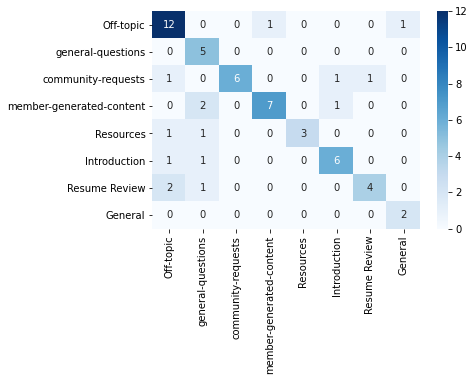

In [43]:
col_labels=['Off-topic','general-questions','community-requests',
                               'member-generated-content','Resources','Introduction',
                               'Resume Review','General']

print("--------BEST Model------")
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)
# print best parameter after tuning
print(grid.best_params_)

df_result = pd.DataFrame(data=confusion_matrix(y_test, grid_predictions,
                       labels=col_labels), index= col_labels, columns=col_labels)


sns.heatmap(df_result, annot=True, cmap="Blues")


In [42]:
print(classification_report(y_test, grid_predictions))

                          precision    recall  f1-score   support

                 General       0.67      1.00      0.80         2
            Introduction       0.75      0.75      0.75         8
               Off-topic       0.71      0.86      0.77        14
               Resources       1.00      0.60      0.75         5
           Resume Review       0.80      0.57      0.67         7
      community-requests       1.00      0.67      0.80         9
       general-questions       0.50      1.00      0.67         5
member-generated-content       0.88      0.70      0.78        10

                accuracy                           0.75        60
               macro avg       0.79      0.77      0.75        60
            weighted avg       0.80      0.75      0.75        60

